# Matlab example
Purpose of this example is try to replicate results of the matlab example https://www.mathworks.com/help/predmaint/ug/Rolling-Element-Bearing-Fault-Diagnosis.html

In [2]:
import glob

import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm

from kurtogram import fast_kurtogram
import utils as ut

matlab_example_data/inner_fault.mat


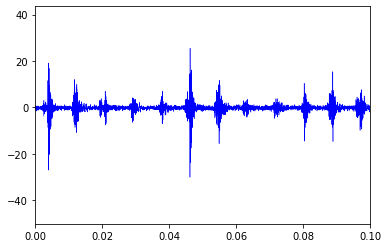

0.0 24413.666666666664


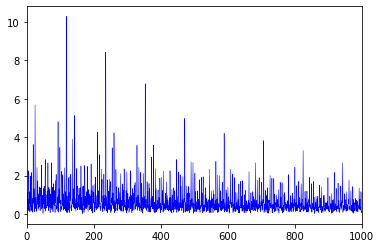

In [3]:
mat_files = glob.glob("matlab_example_data/inner_fault.mat", recursive=True)
print("\n".join(mat_files))

fs = 48828
signal = scipy.io.loadmat(mat_files[0])['xInner'].ravel()
time = np.linspace(0, len(signal)/fs, len(signal))
plt.plot(time, signal, c="b", linewidth=0.5)
plt.xlim(0, 0.1)
plt.show()

analytic_signal = scipy.signal.hilbert(signal)
envelope = np.abs(analytic_signal)
squared_envelope = envelope ** 2
f, X = ut.oneside_fft(squared_envelope, fs)
#plt.plot(f, X)
plt.xlim(0, 1000)
print(f[0], f[-1])
f, X = scipy.signal.periodogram(squared_envelope, fs, window="hann")
X = np.sqrt(X)
plt.plot(f, X, c="b", linewidth=0.5)
plt.show()

matlab_example_data/outer_fault.mat
[ 0.3083091 -0.1723548  0.8998852 ...  0.3001135 -0.946561  -0.9734369]


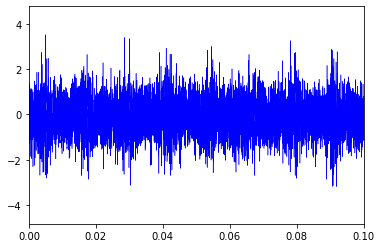

0.0 48827.83333333333


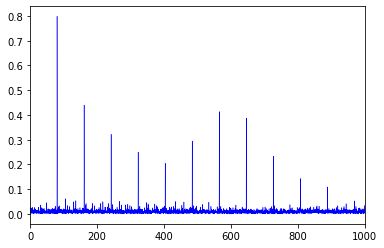

In [4]:
mat_files = glob.glob("matlab_example_data/outer_fault.mat", recursive=True)
print("\n".join(mat_files))

fs = 97656
signal = scipy.io.loadmat(mat_files[0])['xOuter'].ravel()
print(signal)
time = np.linspace(0, len(signal)/fs, len(signal))
plt.plot(time, signal, c="b", linewidth=0.5)
plt.xlim(0, 0.1)
plt.show()

analytic_signal = scipy.signal.hilbert(signal)
envelope = np.abs(analytic_signal)
squared_envelope = envelope ** 2
f, X = ut.oneside_fft(squared_envelope, fs)
#plt.plot(f, X)
plt.xlim(0, 1000)
print(f[0], f[-1])
f, X = scipy.signal.periodogram(squared_envelope, fs, window="hann")
X = np.sqrt(X)
plt.plot(f, X, c="b", linewidth=0.5)
plt.show()

In [5]:
# Kurtogram band selection and bandpass filtering
_, _, _, fc, bandwidth = fast_kurtogram(filtered_signal, fs, nlevel=nlevel)
filtered_signal = ut.bandpass_filter(filtered_signal, fs, fc, bandwidth)

# 3. Squared envelope spectrum
analytic_signal = scipy.signal.hilbert(filtered_signal)
envelope = np.abs(analytic_signal)
squared_envelope = envelope ** 2
f, X = scipy.signal.periodogram(squared_envelope, fs)

NameError: name 'filtered_signal' is not defined